<a href="https://colab.research.google.com/github/deena19liebert/Deep-Learning-Techniques-Lab/blob/main/CNN_Multiclass_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.3278 - loss: 1.8087 - val_accuracy: 0.5270 - val_loss: 1.3281
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.5521 - loss: 1.2587 - val_accuracy: 0.5993 - val_loss: 1.1301
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.6140 - loss: 1.1007 - val_accuracy: 0.6317 - val_loss: 1.0409
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.6561 - loss: 0.9822 - val_accuracy: 0.6688 - val_loss: 0.9516
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.6836 - loss: 0.9095 - val_accuracy: 0.6503 - val_loss: 0.9996
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.7045 - loss: 0.8403 - val_accuracy: 0.6662 - val_loss: 0.9555
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - accuracy: 0.7242 - loss: 0.7871 - val_accuracy: 0.6856 - val_loss: 0.9061
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.7422 - loss: 0.7427 - 

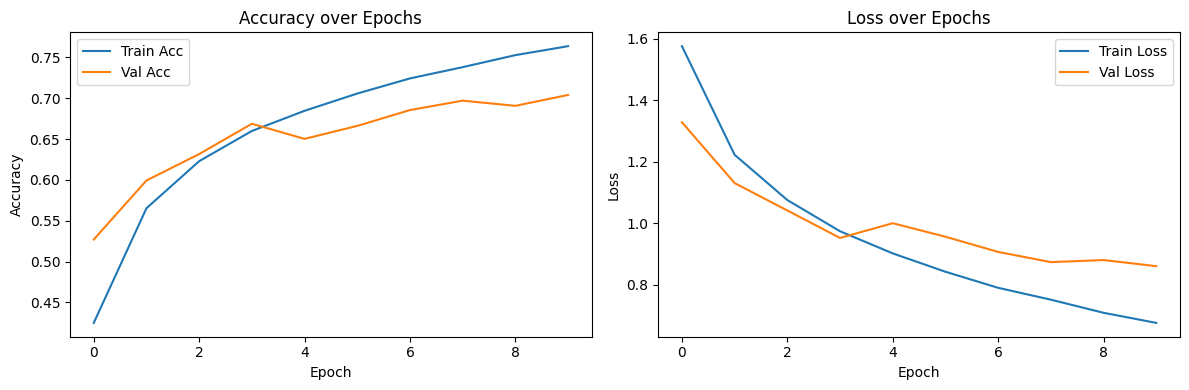

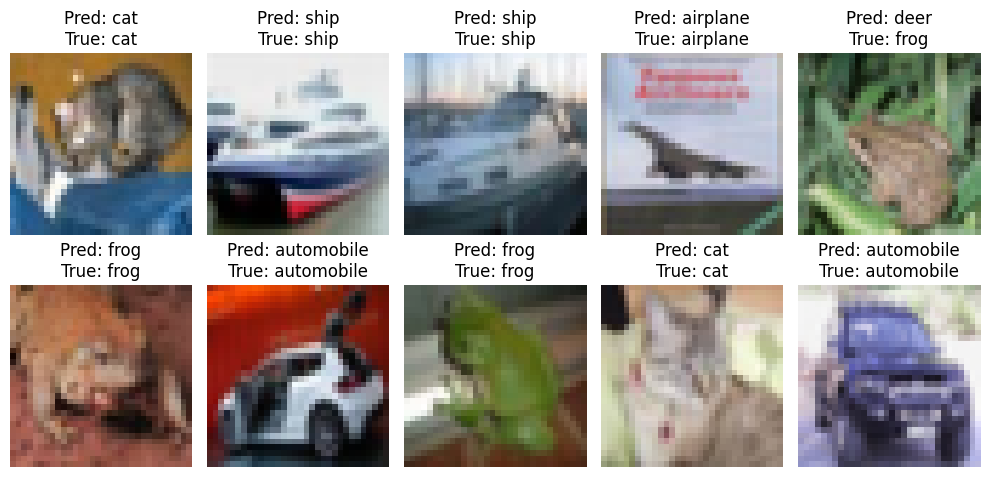

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=10,
                    validation_data=(x_test, y_test_cat),
                    batch_size=64)

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = x_test[i]
    pred = model.predict(img.reshape(1,32,32,3), verbose=0)
    plt.imshow(img)
    plt.title(f"Pred: {class_names[np.argmax(pred)]}\nTrue: {class_names[y_test[i][0]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
